## Flujo de trabajo de un proyecto de Machine Learning

# Evaluación del modelo

## Modelos de clasificación

### Matriz de confusión

- Es una herramienta que permite la visualización del desempeño de un algoritmo que se emplea en aprendizaje supervisado. 
- Cada columna de la matriz representa el número de predicciones de cada clase, mientras que cada fila representa a las instancias en la clase real. 
- Uno de los beneficios de las matrices de confusión es que facilitan ver si el sistema está confundiendo dos clases.

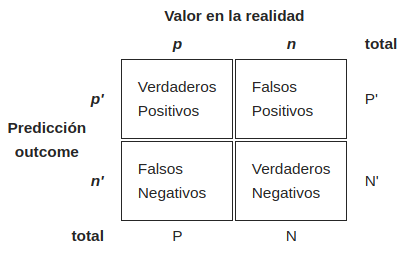
[ref](https://es.wikipedia.org/wiki/Matriz_de_confusi%C3%B3n)



| Real \ Pred | Gato | Perro | Conejo |
|-------------|------|-------|--------|
|        Gato | 5    | 3     | 0      | 
|       Perro | 2    | 3     | 1      | 
|      Conejo | 0    | 2     | 11     | 

In [59]:
from sklearn.metrics import confusion_matrix

y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]

confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

In [60]:
y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]
confusion_matrix(y_true, y_pred, labels=["ant", "bird", "cat"])

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

In [61]:
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
(tn, fp, fn, tp)

(0, 2, 1, 1)

### Accuracy

Calcula el número de predicciones que se corresponden con la etiqueta correcta en el dataset etiquetado

In [45]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score
from sklearn.metrics import accuracy_score

y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]

print(f'Normalizado: {accuracy_score(y_true, y_pred)}')
print(f'Sin normalizar: {accuracy_score(y_true, y_pred, normalize=False)}')

Normalizado: 0.5
Sin normalizar: 2


### Precision

- Es la capacidad de no clasificar como positivos ejemplos que son negativos
- Es el ratio `tp / (tp + fp)` donde tp es el número de true positives y fp el número de false positives.
- El rango va de 0 a 1. El mejor valor es 1 y el peor es 0
- Un mayor valor indica una mayor exactitud predictiva

In [46]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
from sklearn.metrics import precision_score

y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]

# precision by class
print(f'None: {precision_score(y_true, y_pred, average=None)}')

# micro: calculate metrics globally by counting the total true positives, false negatives and false positives
print(f'Micro: {precision_score(y_true, y_pred, average="micro")}')

# macro: calculate metrics for each label, and find their unweighted mean. 
# This does not take label imbalance into account.
print(f'Macro: {precision_score(y_true, y_pred, average="macro")}')

None: [0.66666667 0.         0.        ]
Micro: 0.3333333333333333
Macro: 0.2222222222222222


### Recall
- Es la capacidad del modelo de encontrar todos los casos positivos.
- Es el ratio `tp / (tp + fn)` donde `tp` es el número de true positives y fn el número de false negatives. 
- El rango va de 0 a 1. El mejor valor es 1 y el peor es 0

In [47]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
from sklearn.metrics import recall_score

y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]

# precision by class
print(f'None: {recall_score(y_true, y_pred, average=None)}')

# micro: calculate metrics globally by counting the total true positives, false negatives and false positives
print(f'Micro: {recall_score(y_true, y_pred, average="micro")}') 

# macro: calculate metrics for each label, and find their unweighted mean. 
# This does not take label imbalance into account.
print(f'Macro: {recall_score(y_true, y_pred, average="macro")}')

None: [1. 0. 0.]
Micro: 0.3333333333333333
Macro: 0.3333333333333333


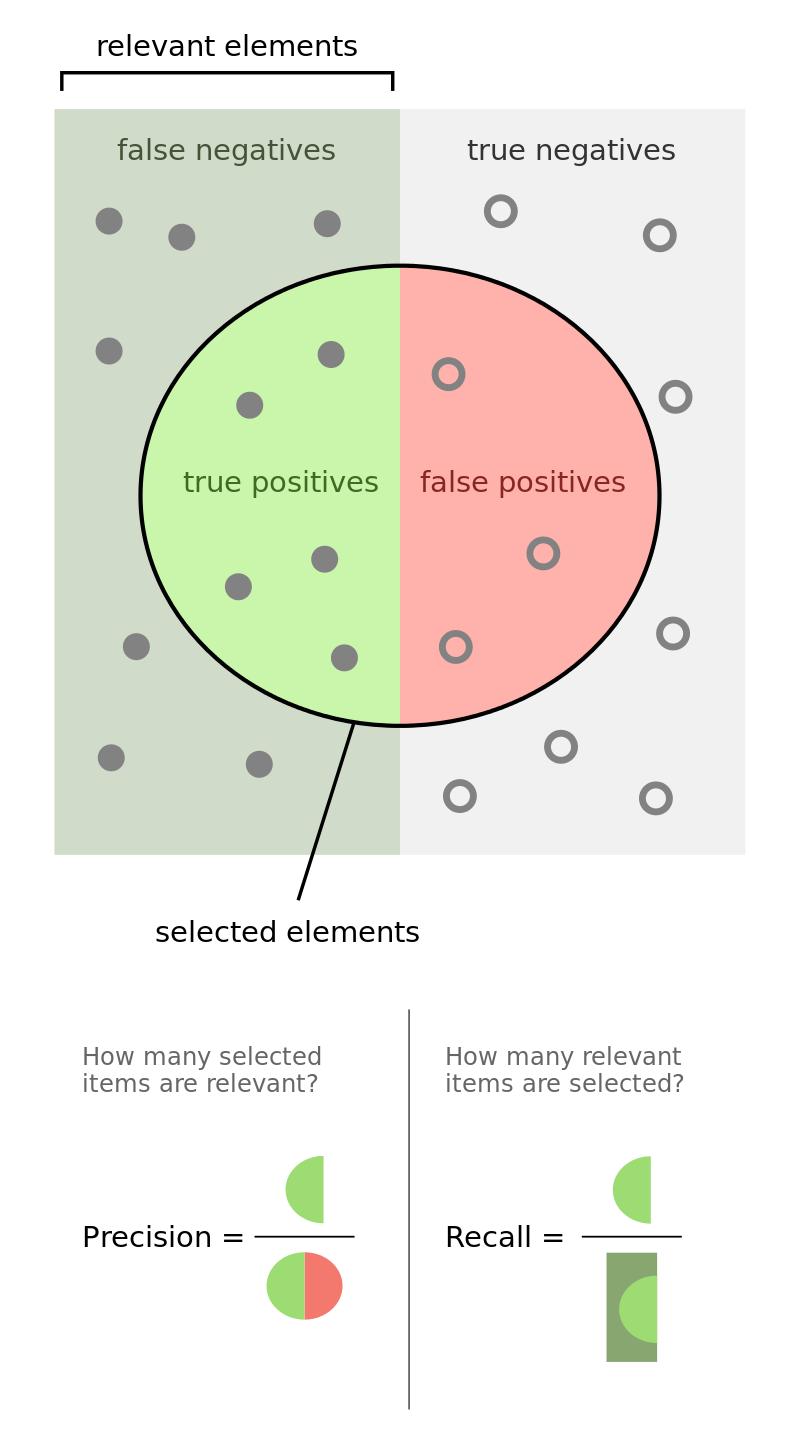
[By Walber - Own work, CC BY-SA 4.0](https://commons.wikimedia.org/w/index.php?curid=36926283)

### F-Score

- También se conoce como F1-Score y F-measure
- Puede interpretarse como la media ponderada del precision y el recall, donde F1 alcanza su mejor valor en 1 y el peor puntaje en 0.
- La fórmula del F-Score es `F1 = 2 * (precision * recall) / (precision + recall)`

In [51]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score
from sklearn.metrics import f1_score

y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]

# precision by class
print(f'None: {f1_score(y_true, y_pred, average=None)}')

# micro: calculate metrics globally by counting the total true positives, false negatives and false positives
print(f'Micro: {f1_score(y_true, y_pred, average="micro")}') 

# macro: calculate metrics for each label, and find their unweighted mean. 
# This does not take label imbalance into account.
print(f'Macro: {f1_score(y_true, y_pred, average="macro")}')

None: [0.8 0.  0. ]
Micro: 0.3333333333333333
Macro: 0.26666666666666666


### Area Under the Receiver Operating Characteristic Curve (ROC AUC)



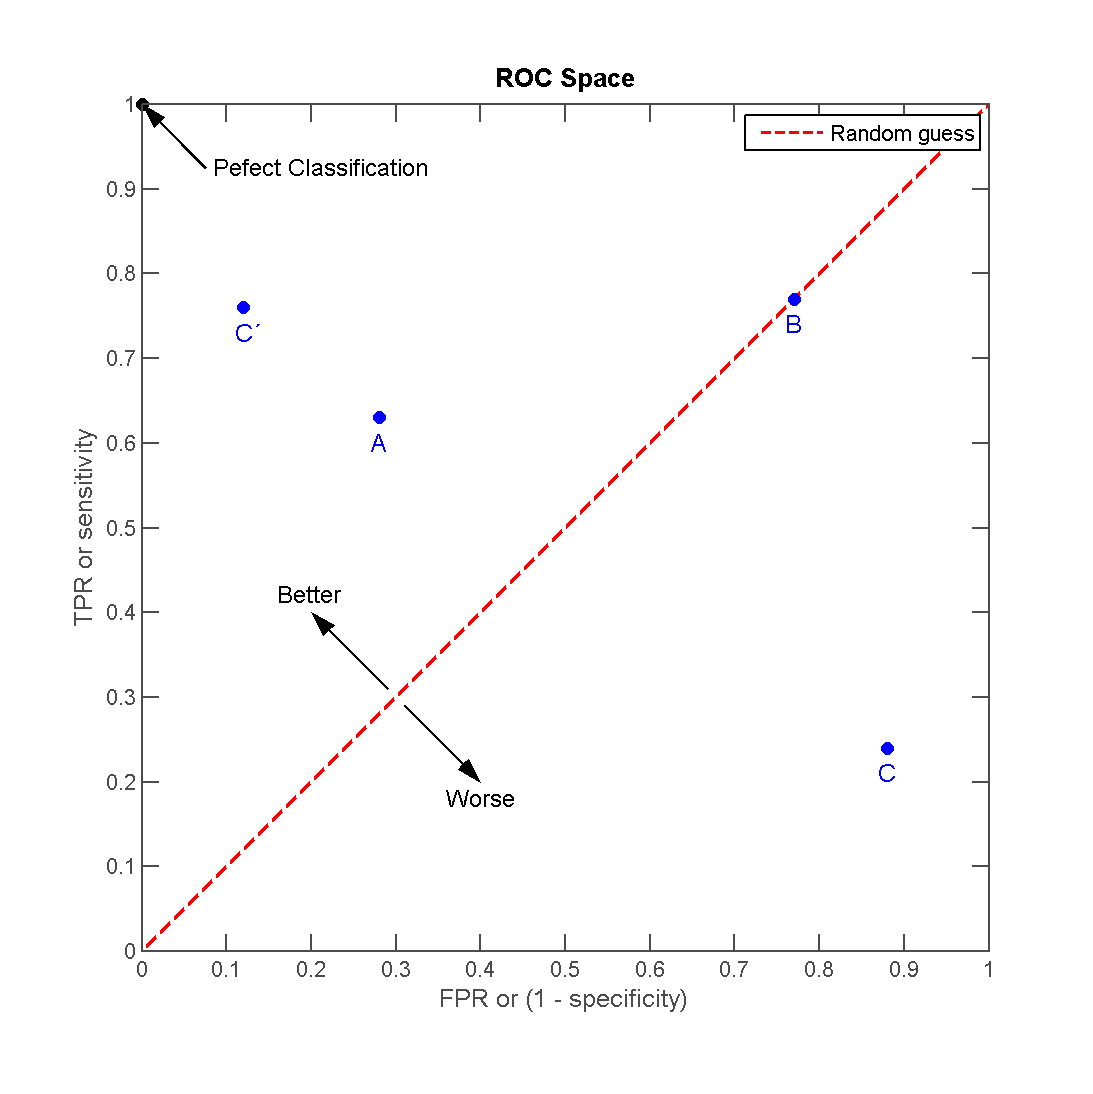

De <a href="//commons.wikimedia.org/wiki/File:ROC_space.png" title="File:ROC space.png">ROC_space.png</a>: <a href="https://en.wikipedia.org/wiki/User:Indon" class="extiw" title="en:User:Indon">Indon</a>derivative work: <a href="//commons.wikimedia.org/w/index.php?title=User:Kai_walz&amp;action=edit&amp;redlink=1" class="new" title="User:Kai walz (page does not exist)">Kai walz</a> (<a href="//commons.wikimedia.org/wiki/User_talk:Kai_walz" title="User talk:Kai walz"><span class="signature-talk">talk</span></a>) - <a href="//commons.wikimedia.org/wiki/File:ROC_space.png" title="File:ROC space.png">ROC_space.png</a>, <a href="http://creativecommons.org/licenses/by-sa/3.0/" title="Creative Commons Attribution-Share Alike 3.0">CC BY-SA 3.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=8326140">Enlace</a>

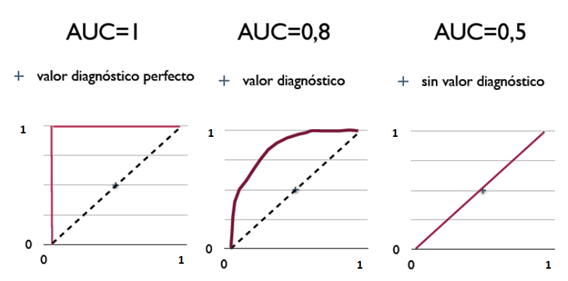

In [1]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score
import numpy as np
from sklearn.metrics import roc_auc_score

y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])

roc_auc_score(y_true, y_scores)

0.75

### El ejemplo del product matching

<img src="../images/product_matching01.png">

### El ejemplo del product matching

<img src="../images/product_matching02.png">

### El ejemplo del product matching

<img src="../images/product_matching03.png">

### El ejemplo del product matching

<img src="../images/product_matching04.png">

## Modelos de regresión

### Mean absolute error

- Es una medida de la diferencia entre dos variables continuas. 
- El error absoluto promedio (MAE) es la distancia vertical promedio entre cada punto y la línea de identidad. 
- MAE es también la distancia horizontal promedio entre cada punto y la línea de identidad.

In [49]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error
from sklearn.metrics import mean_absolute_error

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
print(f'MAE 1: {mean_absolute_error(y_true, y_pred)}')

y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
print(f'MAE 2: {mean_absolute_error(y_true, y_pred)}')


MAE 1: 0.5
MAE 2: 0.75


###  Mean squared error
- El error cuadrático medio (ECM) de un estimador mide el promedio de los errores al cuadrado, es decir, la diferencia entre el estimador y lo que se estima. 
- El ECM es una función de riesgo, correspondiente al valor esperado de la pérdida del error al cuadrado o pérdida cuadrática. 
- La diferencia se produce debido a la aleatoriedad o porque el estimador no tiene en cuenta la información que podría producir una estimación más precisa

In [50]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

print(f'MAE 1: {mean_squared_error(y_true, y_pred)}')

y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]

print(f'MAE 2: {mean_squared_error(y_true, y_pred)}')

MAE 1: 0.375
MAE 2: 0.7083333333333334


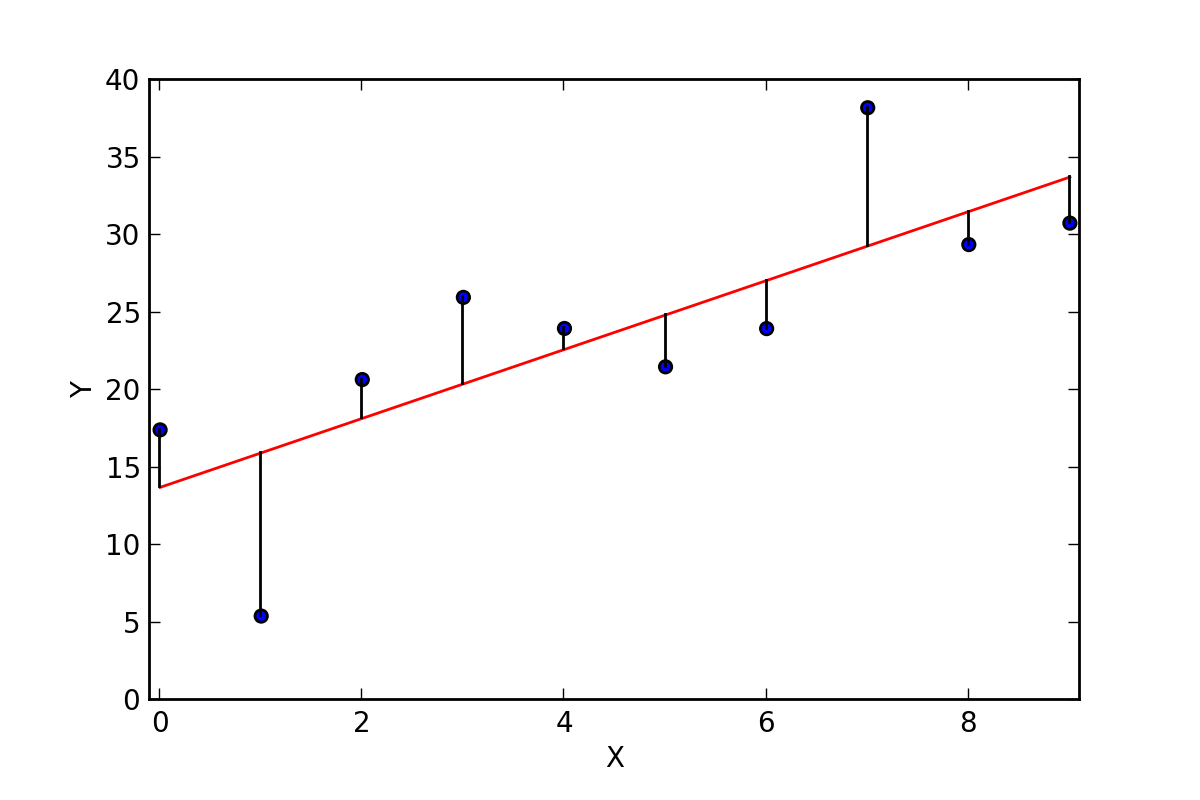